# Iterative Methods for Sparse Linear Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## 4.1 Jacobi and Gauss–Seidel

$$
\dfrac{1}{h^2}(u_{i-1,j} + u_{i+1,j} + u_{i,j-1} + u_{i,j+1} - 4u_{ij}) = f_{ij}
$$
$$
u_{ij} = \dfrac{1}{4}(u_{i-1,j} + u_{i+1,j} + u_{i,j-1} + u_{i,j+1}) -\dfrac{h^2}{4}f_{ij}
$$

In [2]:
# This is the Jacobi iteration for the Poisson problem

m = 7
U = np.zeros([m+2, m+2])
h = 1/(m+1)
F = np.zeros([m+2, m+2])

conv_ker = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0],
])/4

epochs = 10

for _ in range(epochs):
    U[1:-1, 1:-1] = signal.convolve2d(U, conv_ker, mode='valid') - h**2/4*F[1:-1, 1:-1]
# or
for _ in range(epochs):
    U[1:-1, 1:-1] = 1/4*(U[:-2, 1:-1] + U[2:, 1:-1] + U[1:-1, :-2] + U[1:-1, 2:] - h**2*F[1:-1, 1:-1])

In [3]:
# This is what is known as the Gauss–Seidel method, and it would be a lucky coding error since this method generally converges about twice as fast as Jacobi does.

for _ in range(epochs):
    for j in range(1, m+1):
        for i in range(1, m+1):
            U[i,j] = 1/4*(U[i-1, j] + U[i+1,j] + U[i,j-1] + U[i,j+1] - h**2*F[i,j])

## 4.2 Analysis of matrix splitting methods

- Jacobi $ u_i^{[k+1]}=\dfrac{1}{2}( u_{i-1}^{[k]} + u_{i+1}^{[k]} - h^2f_i ) $
- Gauss-Seidel $ u_i^{[k+1]}=\dfrac{1}{2}( u_{i-1}^{[k+1]} + u_{i+1}^{[k]} - h^2f_i ) $

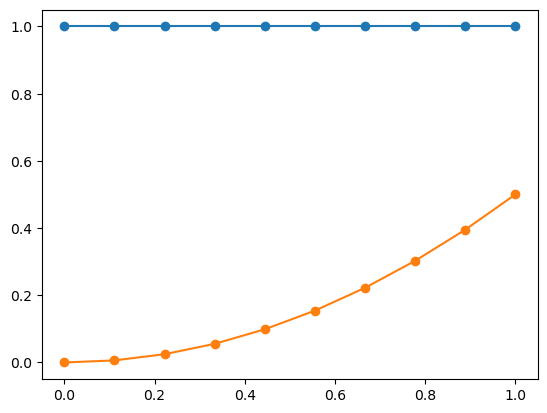

In [4]:
m = 8
h = 1/(m+1)

T = 1
x = np.linspace(0, T, m+2)
f = np.ones(m+2)
u_exact = x**2/2

plt.plot(x, f, '-o')
plt.plot(x, u_exact, '-o')

# (u_exact[2:] - 2*u_exact[1:-1] + u_exact[:-2])/h**2

Text(0.5, 1.0, '$\\log_{10}error$')

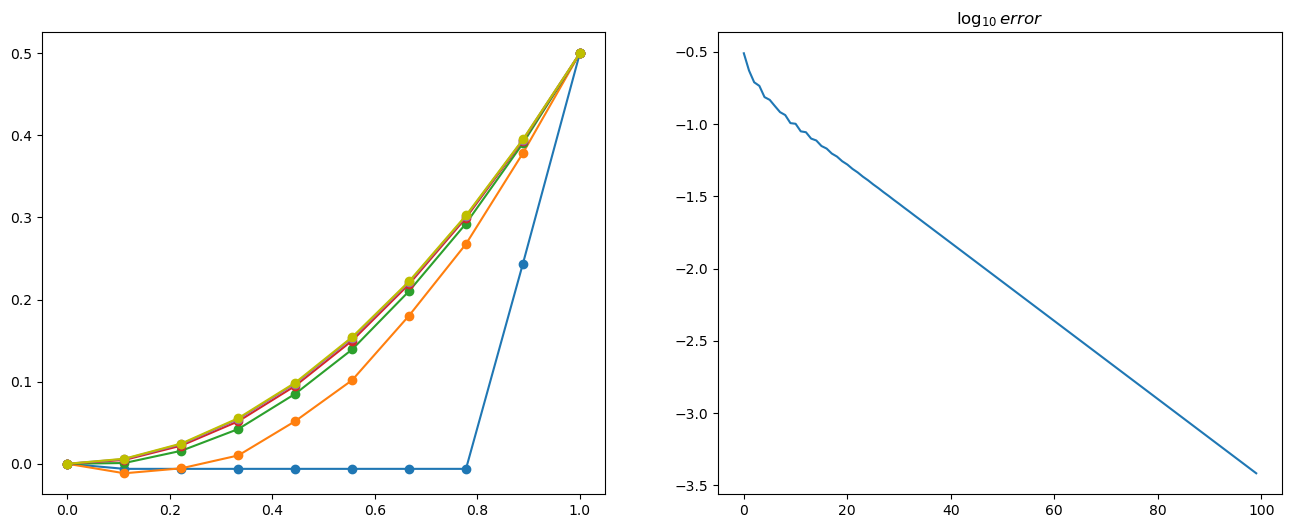

In [5]:
# jacobi
u = np.zeros(m+2)
u[0], u[-1] = 0, .5

epochs = 100
error1 = np.zeros(epochs)

plt.figure(figsize=(16, 6))

plt.subplot(121)
for i in range(epochs):
    u[1:-1] = 1/2*(u[:-2] + u[2:] - h**2*f[1:-1])
    error1[i] = np.max(np.abs(u_exact - u))
    if i%20 == 0:
        plt.plot(x, u, '-o')
plt.plot(x, u_exact, '-oy')


plt.subplot(122)
plt.plot(np.log10(error1))
plt.title(r"$\log_{10}error$")



Text(0.5, 1.0, '$\\log_{10}error$')

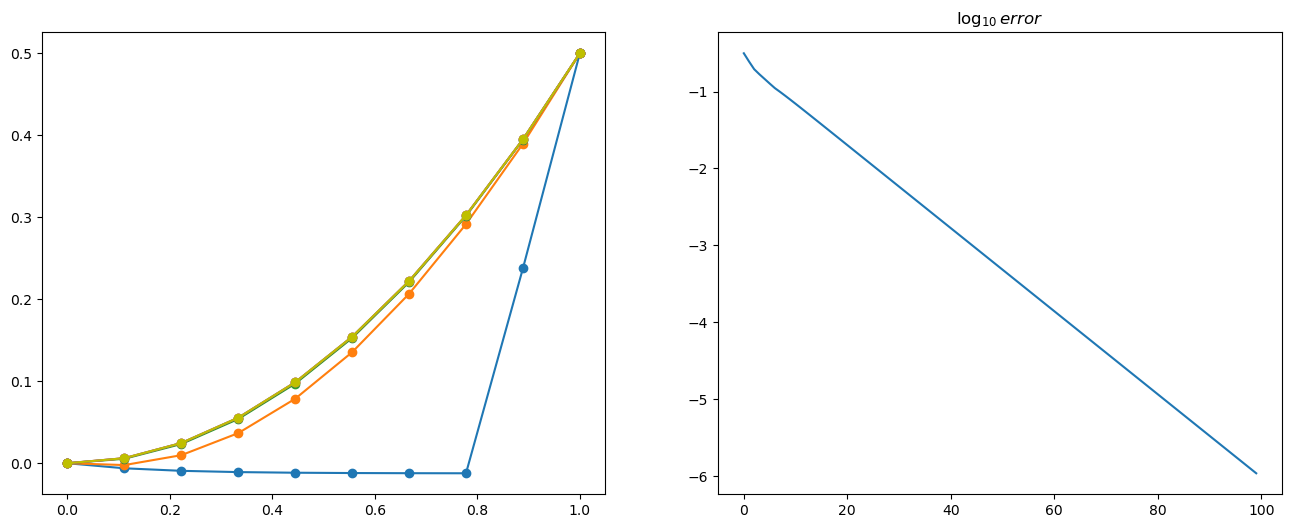

In [6]:
# Gauss-Seidel
u = np.zeros(m+2)
u[0], u[-1] = 0, .5

epochs = 100
error2 = np.zeros(epochs)

plt.figure(figsize=(16, 6))

plt.subplot(121)
for i in range(epochs):
    for j in range(1, m+1):
        u[j] = 1/2*(u[j-1] + u[j+1] - h**2*f[j])
    error2[i] = np.max(np.abs(u_exact - u))
    if i%20 == 0:
        plt.plot(x, u, '-o')
plt.plot(x, u_exact, '-oy')


plt.subplot(122)
plt.plot(np.log10(error2))
plt.title(r"$\log_{10}error$")



### 4.2.2 Successive overrelaxation

$$ u_i^{GS}=\dfrac{1}{2}( u_{i-1}^{[k+1]} + u_{i+1}^{[k]} - h^2f_i ) $$
$$ u_i^{[k+1]}=u_{i}^{[k]} + \omega(u_{i}^{GS} - u_{i}^{[k]} ) $$
得到
$$ u_i^{[k+1]}=\dfrac{\omega}{2}( u_{i-1}^{[k+1]} + u_{i+1}^{[k]} - h^2f_i ) + (1-\omega)u_{i}^{[k]} $$

Text(0.5, 1.0, '$\\log_{10}error$')

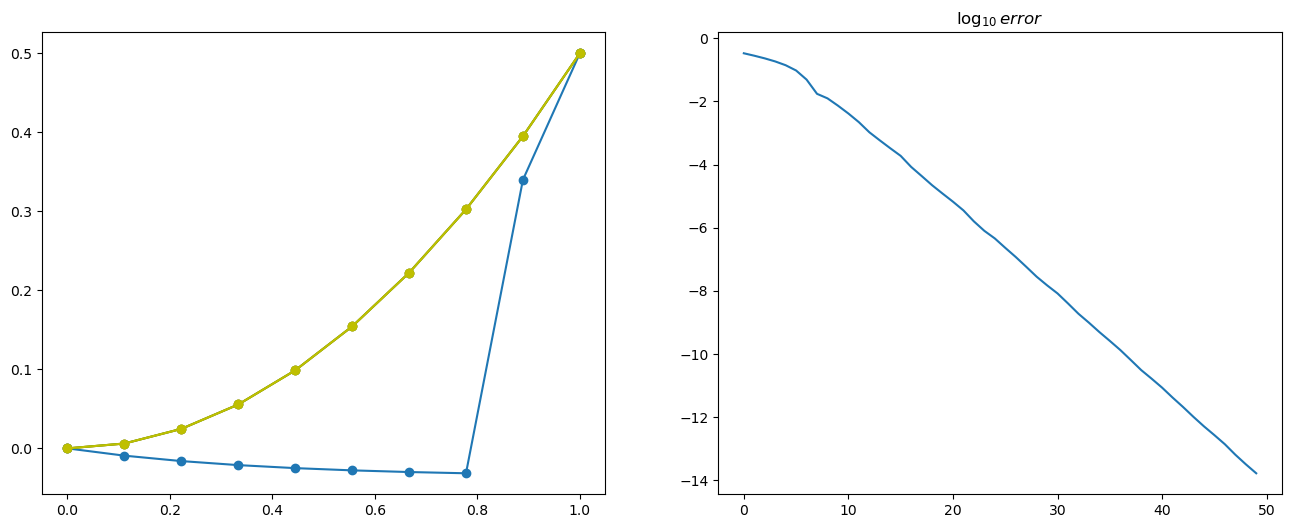

In [7]:
# Successive overrelaxation
u = np.zeros(m+2)
u[0], u[-1] = 0, .5

epochs = 50
error3 = np.zeros(epochs)
w = 2/(1+np.sin(np.pi*h))

plt.figure(figsize=(16, 6))

plt.subplot(121)
for i in range(epochs):
    for j in range(1, m+1):
        u[j] = w/2*(u[j-1] + u[j+1] - h**2*f[j]) + (1-w)*u[j]
    error3[i] = np.max(u_exact - u)
    if i%20 == 0:
        plt.plot(x, u, '-o')
plt.plot(x, u_exact, '-oy')


plt.subplot(122)
plt.plot(np.log10(error3))
plt.title(r"$\log_{10}error$")


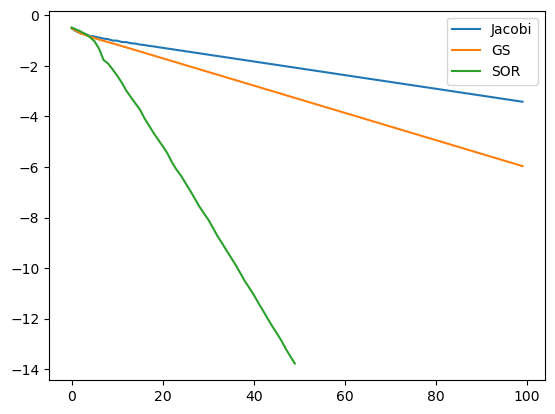

In [8]:
plt.plot(np.log10(error1))
plt.plot(np.log10(error2))
plt.plot(np.log10(error3))
plt.legend(['Jacobi', 'GS', 'SOR'])


## 4.3 Descent methods and conjugate gradients

$$
\phi(u)=\dfrac{1}{2}u^T A u - u^T f
$$
$$
\nabla\phi(u) = Au-f
$$

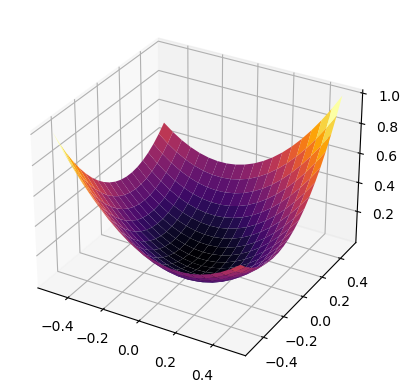

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x0 = np.linspace(-.5,.5, 20)
x1 = np.linspace(-.5,.5, 20)

x0,x1= np.meshgrid(x0, x1)
z = np.array(1.5*x0**2 + 1*x0*x1 + 1.5*x1**2)

ax.plot_surface(x0,x1,z,cmap='inferno')
plt.show()


In [10]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Surface(x=x0, y=x1, z=z)])
fig.show()

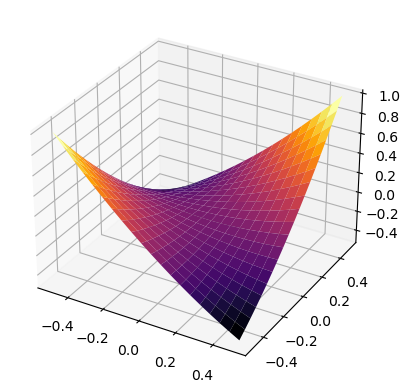

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x0 = np.linspace(-.5,.5, 20)
x1 = np.linspace(-.5,.5, 20)

x0,x1= np.meshgrid(x0, x1)
z = np.array(.5*x0**2 + 3*x0*x1 + .5*x1**2)

ax.plot_surface(x0,x1,z,cmap='inferno')
plt.show()


### 4.3.1 The method of steepest descent

$$
u_k = u_{k-1} - \alpha_{k-1}\nabla\phi(u_{k-1})
$$

(-0.5, 0.5, -0.5, 0.5)

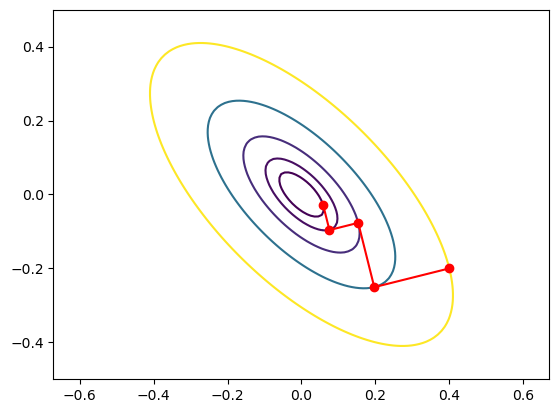

In [54]:
x0 = np.linspace(-.5,.5, 100)
x1 = np.linspace(-.5,.5, 100)

x0,x1= np.meshgrid(x0, x1)
A = np.array([
    [1.5, 1],
    [1, 1.5]
])
z = np.array(A[0, 0]*x0**2 + (A[0, 1]+A[1, 0])*x0*x1 + A[1, 1]*x1**2)

f = np.array([0, 0])

u0 = np.array([0.4, -0.2])
r0 = f-A@u0

u = [u0]
r = [r0]
w = []
a = []

for k in range(4):
    w.append(A @ r[k])
    a.append( (r[k] @ r[k]) / (r[k] @ w[k]) )

    u.append(u[k]+a[k]*r[k])
    r.append(r[k]-a[k]*w[k])

zk = [(A[0, 0]*uk[0]**2 + (A[0, 1]+A[1, 0])*uk[0]*uk[1] + A[1, 1]*uk[1]**2) for uk in u]
plt.contour(x0, x1, z, zk[::-1])
u = np.array(u).T
plt.plot(u[0], u[1], '-or')
plt.axis('equal')